In [27]:
from sklearn.datasets import load_digits
digits = load_digits()

print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


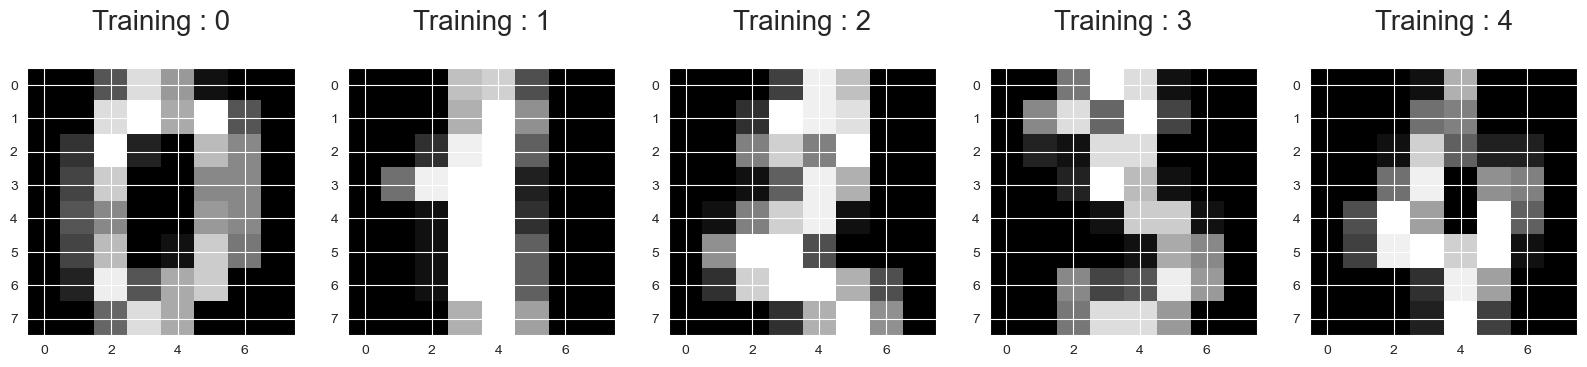

In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title("Training : %i\n"%label, fontsize=20)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.predict(X_test[0].reshape(1,-1)))
print(lr.predict(X_test[0:10]))

[2]
[2 8 2 6 6 7 1 9 8 5]


/Users/unghoe/.asdf/installs/python/miniconda3-latest/envs/DataSpell/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
predictions = lr.predict(X_test)
score = lr.score(X_test, y_test)
print(score)

0.9533333333333334


In [31]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


Text(0.5, 1.0, 'Accuracy : 0.9511111111111111')

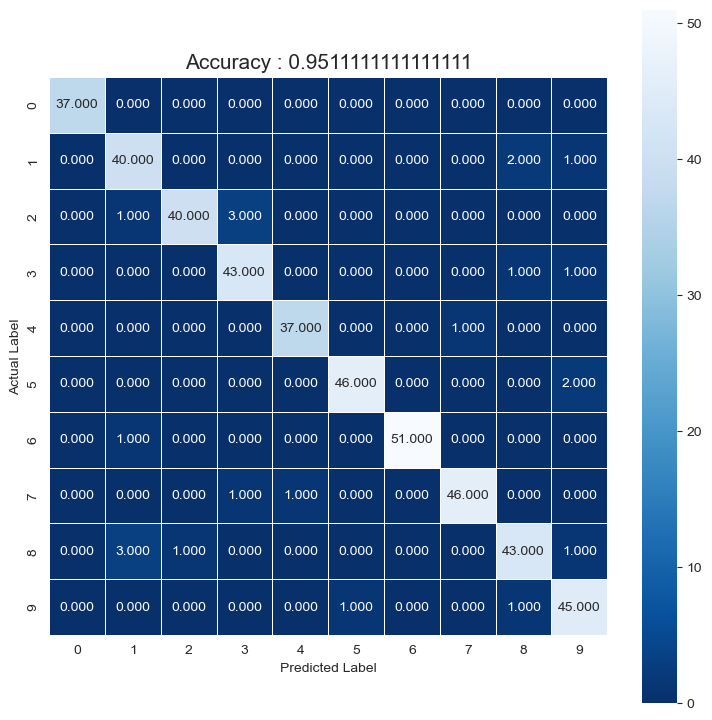

In [32]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = "Accuracy : {0}".format(score)
plt.title(all_sample_title, size=15)

In [33]:
#정확도(titanic_df)실험 - 분류모델 작성 (넘어감)

import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    #fit() 메소드는 아무것도 학습하지 않음.
    def fit(self, X , y=None):
        pass

    #predict() 메소드는 단순히 Sex feature가 1 이면 0, 그렇지 않으면 1 로 예측함.
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        return pred

##### 정확도 (titanic_df) 실험 - MNIST 셋 실험

In [34]:
from sklearn.datasets import load_digits #digits 가져오기
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator  # 사용자 정의 분류기를 만들기 위해 BaseEstimator
from sklearn.metrics import accuracy_score # 정확도 측정을 위해
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass

    # 입력값으로 들어오는 x 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target == 7).astype(int)
X_train, X_test, y_trian, y_test = train_test_split( digits.data, y, random_state=11)
test=X_train[0].reshape(8,8)

# 불균현항 레이블 데이터 분포도 확인.
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf =  MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)
레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


##### 오차행렬

In [35]:
from sklearn.metrics import confusion_matrix
# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix 출력
print(confusion_matrix(y_test , fakepred))

[[405   0]
 [ 45   0]]


In [36]:
from sklearn.metrics import confusion_matrix
# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix 출력
print(confusion_matrix(y_test , fakepred))
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("정밀도 :", precision_score(y_test, fakepred))
print("재현율 :", recall_score(y_test, fakepred))

[[405   0]
 [ 45   0]]
정밀도 : 0.0
재현율 : 0.0


/Users/unghoe/.asdf/installs/python/miniconda3-latest/envs/DataSpell/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### K-Means 파이썬

In [37]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

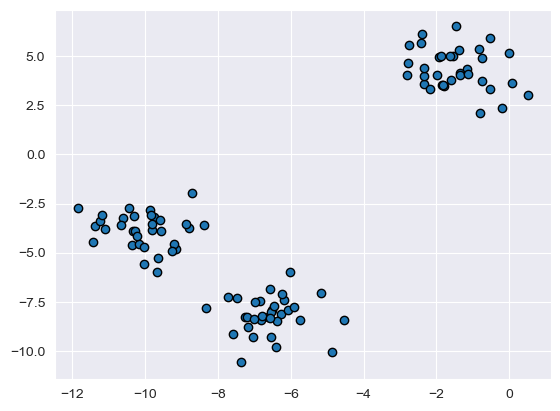

In [38]:
X, y = make_blobs(random_state=1)
plt.scatter(X[:,0], X[:,1], edgecolor="k")
plt.show()

In [39]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)

pred = kmeans.fit_predict(X)
print(pred)

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


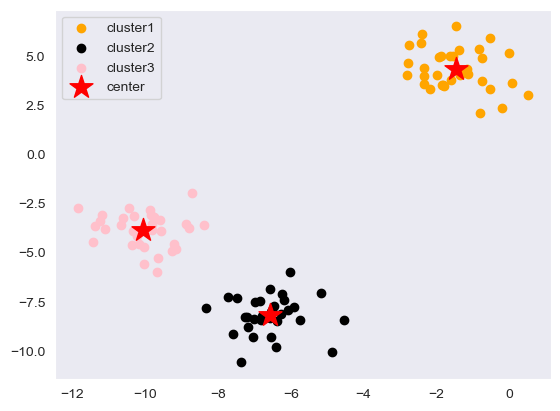

In [40]:
plt.scatter(X[pred==0, 0], X[pred==0, 1], c='orange', label='cluster1')
plt.scatter(X[pred==1, 0], X[pred==1, 1], c='black', label='cluster2')
plt.scatter(X[pred==2, 0], X[pred==2, 1], c='pink', label='cluster3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='*', c='r', s=300, label="center")
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

###### 계층적 군집화

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [42]:
X = np.array([[5,3],
              [10,15], [15,12], [24,10], [30,30], [85,70],
              [71,80], [60,78], [70,55], [80,91]])

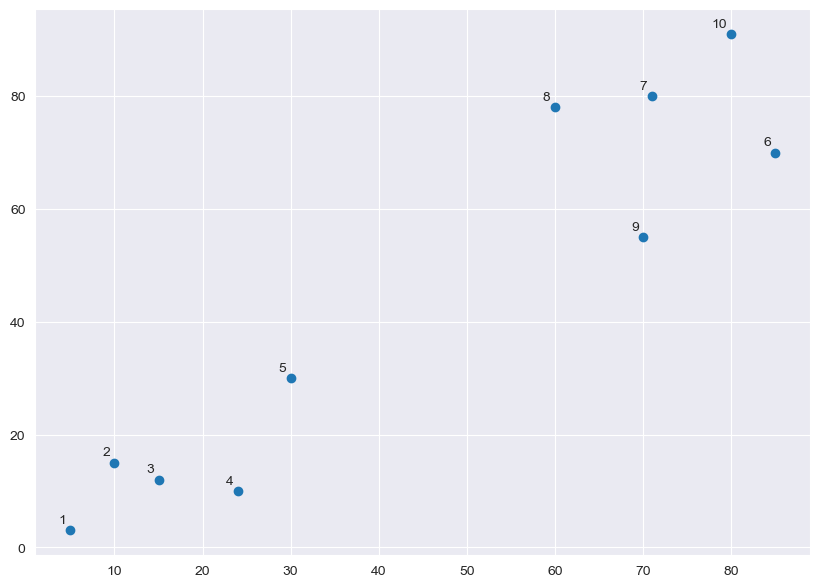

In [43]:
import matplotlib.pyplot as plt
labels = range(1, 11)
plt.figure(figsize=(10,7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0], X[:,1], label='True Position')

for label, x, y in zip(labels, X[:,0], X[:,1]):
  plt.annotate(label, xy=(x,y), xytext=(-3, 3),
               textcoords='offset points', ha='right', va='bottom')
plt.show()

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

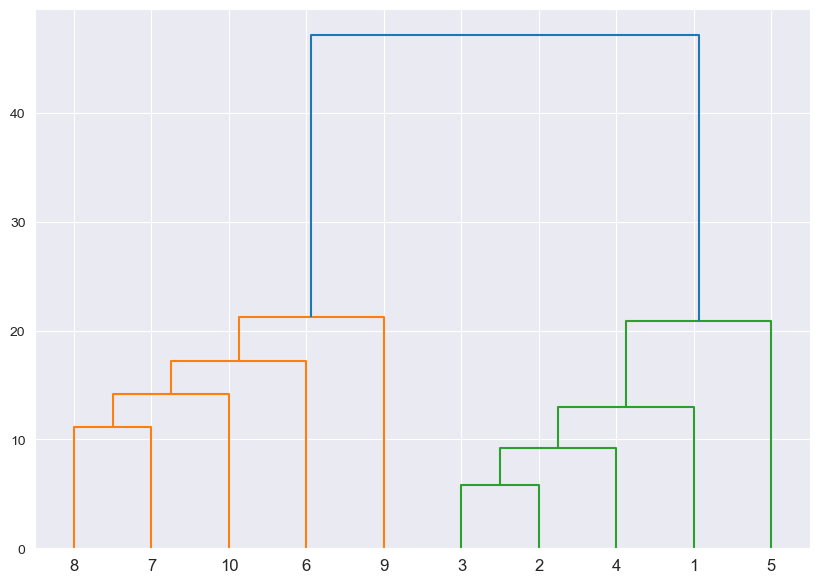

In [45]:
labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

###### DBSCAN 밀도 기반 군집화

In [46]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
data = pd.concat([data, labels], axis=1)
data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
feature = data[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

model = DBSCAN(eps=0.5, min_samples=5)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as new column
r = pd.concat([feature, predict], axis=1)
print(r)

     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        1
146           6.3          2.5           5.0          1.9        1
147           6.5          3.0           5.2          2.0        1
148           6.2          3.4           5.4          2.3        1
149           5.9          3.0           5.1          1.8        1

[150 rows x 5 columns]


/Users/unghoe/.asdf/installs/python/miniconda3-latest/envs/DataSpell/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/unghoe/.asdf/installs/python/miniconda3-latest/envs/DataSpell/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/unghoe/.asdf/installs/python/miniconda3-latest/envs/DataSpell/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/unghoe/.asdf/installs/python/miniconda3-latest/envs/DataSpel

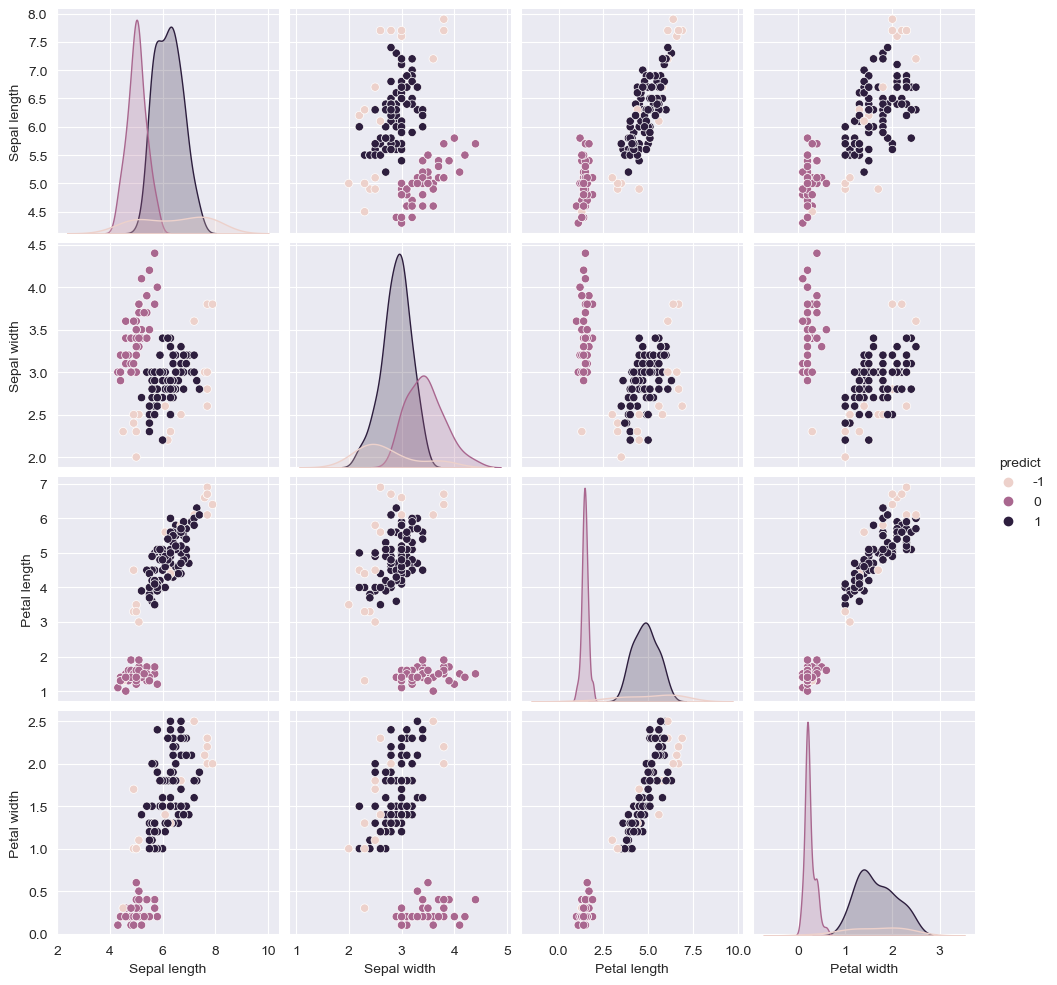

In [49]:
#pairplot with Seaborn
sns.pairplot(r, hue='predict')
plt.show()

/Users/unghoe/.asdf/installs/python/miniconda3-latest/envs/DataSpell/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/unghoe/.asdf/installs/python/miniconda3-latest/envs/DataSpell/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/unghoe/.asdf/installs/python/miniconda3-latest/envs/DataSpell/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/unghoe/.asdf/installs/python/miniconda3-latest/envs/DataSpel

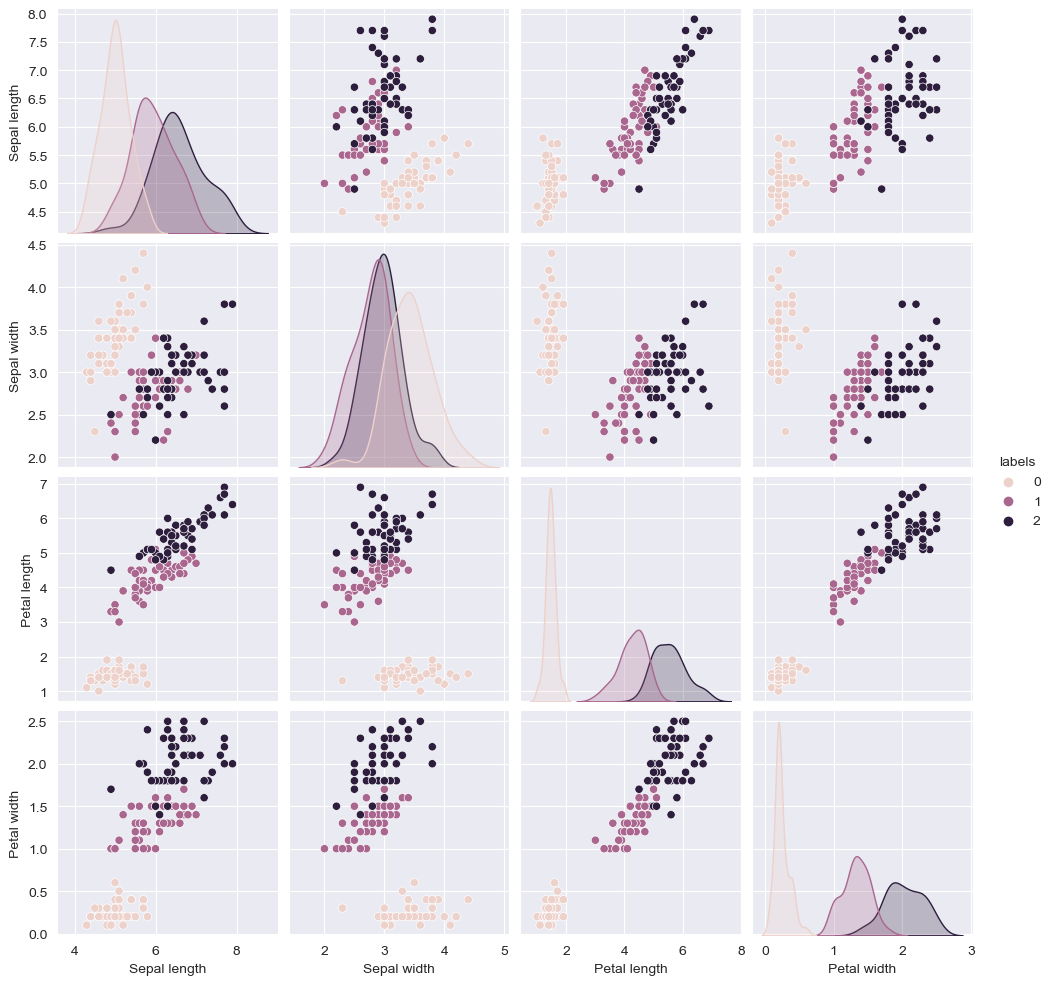

In [52]:
#pairplot with Seaborn
sns.pairplot(data, hue='labels')
plt.show()

/Users/unghoe/.asdf/installs/python/miniconda3-latest/envs/DataSpell/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/unghoe/.asdf/installs/python/miniconda3-latest/envs/DataSpell/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/unghoe/.asdf/installs/python/miniconda3-latest/envs/DataSpell/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/unghoe/.asdf/installs/python/miniconda3-latest/envs/DataSpel

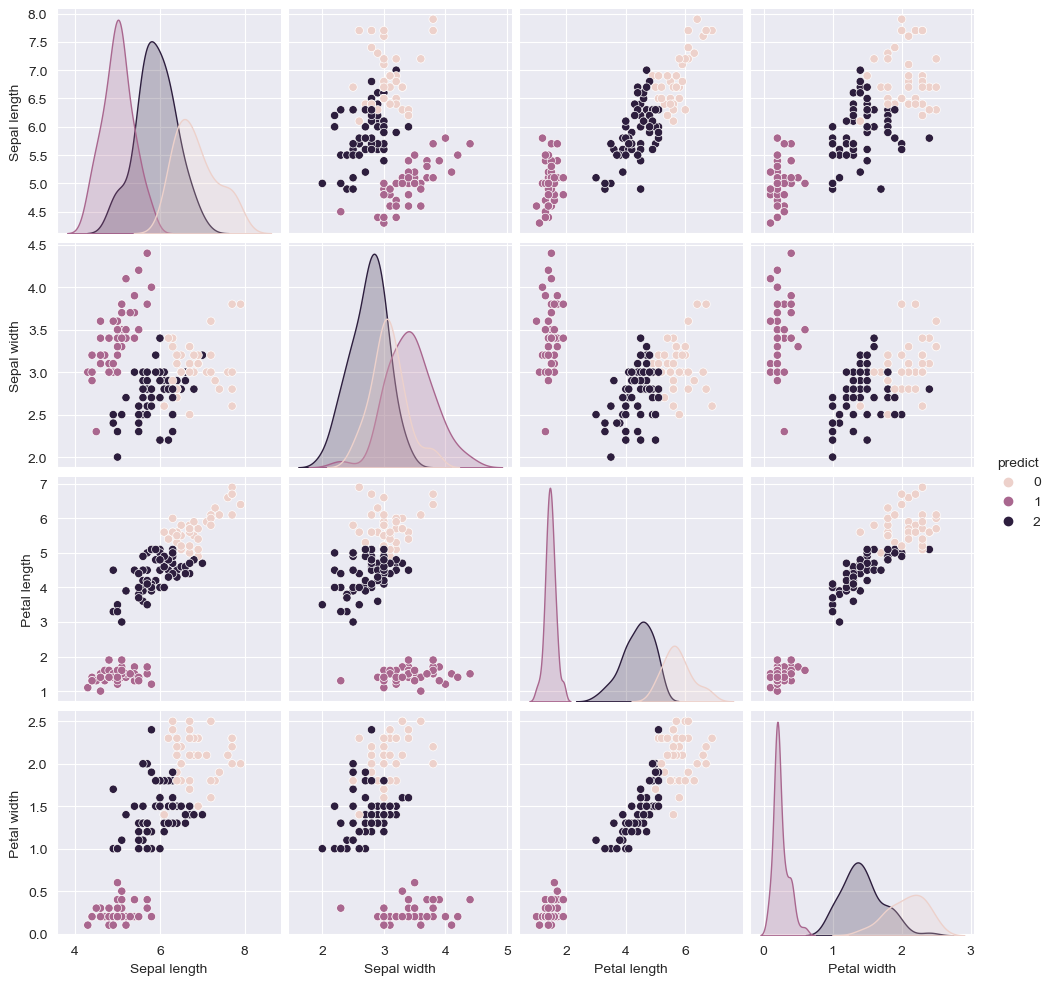

In [51]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=21, n_init=10)
km.fit(feature)
new_labels=pd.DataFrame(km.labels_)
new_labels.columns=['predict']
r2 = pd.concat([feature, new_labels], axis=1)
#pairplot with Seaborn
sns.pairplot(r2, hue='predict')
plt.show()